# Data Analysis and Data Science
## Putting it all together 

By: Caroline Labelle
<br>For: BCM6065-65

<br>
Date: Date: July 6th, 2023

<hr style="border:1px solid black"> </hr>

In [1]:
### Student Name: Tyler Lussier

Complete the following exercises and push your Notebook to your GitHum account. You have until July 7th, 5PM to submit your GitHub account URL to StudiUM.

In [2]:
### Import sklearn
import sklearn.decomposition, sklearn.cluster

### Import scipy
import scipy as sp

### Import pandas, numpy, seaborn and matplotlib.pyplot
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
sns.set(rc={'figure.figsize':(4, 2)})
sns.set_theme(context="notebook", style="white", palette="Set2")

# Breast Cancer Subtypes Analysis [50 pts]

You are given a gene expression dataset of N breast cancer patients with their clinical subtype. You wish to know if you can assess the clinical subtypes based on the gene expression.

## Import the data [10 pts]

Your dataset concist of three files: `genes_id.txt`, `patient_subtype.txt` and `patient_expression.txt`. Import the various files and build your dataset daframe.

In [33]:
genes_id = pd.read_csv("genes_id.txt", header=None)

In [34]:
genes_id

,0
0,ENSG00000011426.9
1,ENSG00000054598.6
2,ENSG00000062038.12
3,ENSG00000077152.8
4,ENSG00000082175.13
5,ENSG00000089685.13
6,ENSG00000091831.20
7,ENSG00000092621.10
8,ENSG00000094804.8
9,ENSG00000099953.8


In [35]:
pat_exp  = pd.read_csv("patient_expression.txt", sep=" ", header=None)

In [36]:
pat_exp

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,1.326515,3.475678,2.374959,3.409941,0.014148,3.235387,0.094595,4.488874,2.023978,3.996567,...,0.415417,3.163366,1.751804,1.727270,4.541346,3.437507,5.678637,7.451924,0.598057,2.860720
1,1.885133,2.752910,3.770004,3.822052,0.051402,3.001023,0.241303,3.680198,1.820556,1.344271,...,2.035764,2.339897,0.949565,1.967062,4.167635,3.288760,5.370061,2.870596,0.102755,3.075090
2,3.246316,4.423018,3.700385,4.369893,0.155187,3.752491,0.102125,3.779098,2.218593,1.927426,...,1.123048,3.647681,1.063245,2.876544,4.498677,2.722251,3.125330,1.928449,0.374845,2.531836
3,2.161512,2.314358,3.562899,3.786747,0.039245,4.227823,0.493791,4.124650,2.202475,2.317170,...,0.930984,3.071066,0.577870,2.554480,4.879861,3.597988,5.953152,3.761062,0.528845,1.604472
4,2.795468,1.876752,0.658127,2.581386,0.014486,2.688765,0.432283,2.655957,1.872897,0.924654,...,1.975961,2.893713,0.272402,2.119050,3.571224,2.554718,0.189085,0.000000,0.199501,0.041927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,0.820838,2.418684,3.460263,1.714065,2.574779,1.158088,2.099645,2.689138,0.705885,3.340791,...,2.522965,1.112896,2.147804,0.498596,1.633678,1.791459,5.193883,5.470001,2.507121,2.424799
641,1.666605,1.818016,2.965531,3.398361,1.131149,2.243665,2.103245,3.090764,1.380203,4.770786,...,1.989089,2.517961,1.820856,1.147327,3.336830,2.926771,4.834529,5.614588,1.520555,2.128657
642,0.810583,2.097097,3.595351,1.667315,0.563232,1.041924,1.894974,1.950360,1.017512,3.408128,...,1.953431,1.019320,1.837105,0.575619,1.638372,1.749170,5.413128,5.591127,2.129137,1.244375
643,1.153391,0.935530,2.415240,2.179527,0.183943,1.688365,0.297845,2.814779,0.754930,4.585375,...,0.820314,2.377948,2.120787,0.626063,2.161975,1.224772,3.553468,3.305371,1.386436,0.515823


In [37]:
pat_sub = pd.read_csv("patient_subtype.txt", header=None, names=["Subtype"])

In [38]:
pat_sub

,Subtype
0,Basal
1,Basal
2,Basal
3,Basal
4,Basal
...,...
640,Normal
641,Normal
642,Normal
643,Normal


In [39]:
### How many patients are you considering?
print(len(pat_sub), "patients")

### How many genes are you considering?
print(len(genes_id), "genes")

645 patients
47 genes


In [48]:
### Combine the data from all three files into one dataframe
### Clue: you should define columns' names and add a column
pat_exp.columns = genes_id.iloc[:, 0]
#pat_exp
gene_exp = pat_exp.join(pat_sub)
gene_exp

,ENSG00000011426.9,ENSG00000054598.6,ENSG00000062038.12,ENSG00000077152.8,ENSG00000082175.13,ENSG00000089685.13,ENSG00000091831.20,ENSG00000092621.10,ENSG00000094804.8,ENSG00000099953.8,...,ENSG00000171848.12,ENSG00000173890.15,ENSG00000174371.15,ENSG00000175063.15,ENSG00000176890.14,ENSG00000186081.10,ENSG00000186847.5,ENSG00000186868.14,ENSG00000261857.5,Subtype
0,1.326515,3.475678,2.374959,3.409941,0.014148,3.235387,0.094595,4.488874,2.023978,3.996567,...,3.163366,1.751804,1.727270,4.541346,3.437507,5.678637,7.451924,0.598057,2.860720,Basal
1,1.885133,2.752910,3.770004,3.822052,0.051402,3.001023,0.241303,3.680198,1.820556,1.344271,...,2.339897,0.949565,1.967062,4.167635,3.288760,5.370061,2.870596,0.102755,3.075090,Basal
2,3.246316,4.423018,3.700385,4.369893,0.155187,3.752491,0.102125,3.779098,2.218593,1.927426,...,3.647681,1.063245,2.876544,4.498677,2.722251,3.125330,1.928449,0.374845,2.531836,Basal
3,2.161512,2.314358,3.562899,3.786747,0.039245,4.227823,0.493791,4.124650,2.202475,2.317170,...,3.071066,0.577870,2.554480,4.879861,3.597988,5.953152,3.761062,0.528845,1.604472,Basal
4,2.795468,1.876752,0.658127,2.581386,0.014486,2.688765,0.432283,2.655957,1.872897,0.924654,...,2.893713,0.272402,2.119050,3.571224,2.554718,0.189085,0.000000,0.199501,0.041927,Basal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,0.820838,2.418684,3.460263,1.714065,2.574779,1.158088,2.099645,2.689138,0.705885,3.340791,...,1.112896,2.147804,0.498596,1.633678,1.791459,5.193883,5.470001,2.507121,2.424799,Normal
641,1.666605,1.818016,2.965531,3.398361,1.131149,2.243665,2.103245,3.090764,1.380203,4.770786,...,2.517961,1.820856,1.147327,3.336830,2.926771,4.834529,5.614588,1.520555,2.128657,Normal
642,0.810583,2.097097,3.595351,1.667315,0.563232,1.041924,1.894974,1.950360,1.017512,3.408128,...,1.019320,1.837105,0.575619,1.638372,1.749170,5.413128,5.591127,2.129137,1.244375,Normal
643,1.153391,0.935530,2.415240,2.179527,0.183943,1.688365,0.297845,2.814779,0.754930,4.585375,...,2.377948,2.120787,0.626063,2.161975,1.224772,3.553468,3.305371,1.386436,0.515823,Normal


## Explore the dataset [20 pts]

In [50]:
### How many subtypes are you considering?
print(gene_exp.Subtype.nunique(), "subtypes")

5 subtypes


In [52]:
### How many patients are associtated to each subtype?
print(gene_exp.Subtype.value_counts(), "subtypes")

Subtype
Basal     191
LumA      179
LumB      165
Her2       82
Normal     28
Name: count, dtype: int64 subtypes


In [89]:
gene_exp.iloc[:,:47].mean()

ENSG00000011426.9     2.164062
ENSG00000054598.6     1.535686
ENSG00000062038.12    2.102870
ENSG00000077152.8     3.132112
ENSG00000082175.13    1.179845
ENSG00000089685.13    2.554557
ENSG00000091831.20    2.491631
ENSG00000092621.10    2.452480
ENSG00000094804.8     1.803410
ENSG00000099953.8     3.506780
ENSG00000101057.14    2.927418
ENSG00000104332.10    2.226754
ENSG00000105173.12    1.360070
ENSG00000106605.9     3.432338
ENSG00000107262.15    2.479991
ENSG00000115648.12    2.966889
ENSG00000117399.12    2.978518
ENSG00000117724.11    2.402607
ENSG00000128422.14    2.524521
ENSG00000129514.5     3.439974
ENSG00000133627.16    1.146421
ENSG00000134057.13    3.088703
ENSG00000135679.20    2.056612
ENSG00000136997.13    3.338576
ENSG00000138180.14    2.161510
ENSG00000141424.11    4.854191
ENSG00000141736.12    3.646903
ENSG00000141738.12    2.391021
ENSG00000142945.11    2.190188
ENSG00000146648.14    1.253302
ENSG00000148773.11    2.236166
ENSG00000151715.6     1.273940
ENSG0000

In [90]:
exp_mean = gene_exp.iloc[:,:47].mean()

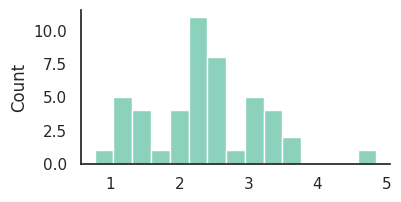

In [91]:
### Generate a graph of the average expression of each gene.
pat_exp.mean()
sns.histplot(gene_exp, x=exp_mean, bins=15)
sns.despine()

In [92]:
gene_exp.iloc[:,:47].std()

ENSG00000011426.9     0.781086
ENSG00000054598.6     1.254415
ENSG00000062038.12    1.246204
ENSG00000077152.8     0.744226
ENSG00000082175.13    1.332091
ENSG00000089685.13    0.854562
ENSG00000091831.20    1.798359
ENSG00000092621.10    1.145830
ENSG00000094804.8     0.715625
ENSG00000099953.8     1.197679
ENSG00000101057.14    1.080362
ENSG00000104332.10    1.788465
ENSG00000105173.12    0.858695
ENSG00000106605.9     0.672515
ENSG00000107262.15    0.581383
ENSG00000115648.12    1.445019
ENSG00000117399.12    0.930666
ENSG00000117724.11    0.743877
ENSG00000128422.14    1.880477
ENSG00000129514.5     1.752245
ENSG00000133627.16    0.511039
ENSG00000134057.13    0.626176
ENSG00000135679.20    0.489934
ENSG00000136997.13    0.908470
ENSG00000138180.14    0.721745
ENSG00000141424.11    1.352087
ENSG00000141736.12    1.110351
ENSG00000141738.12    0.962185
ENSG00000142945.11    0.759882
ENSG00000146648.14    0.950554
ENSG00000148773.11    0.738464
ENSG00000151715.6     0.961420
ENSG0000

In [93]:
st_dev = gene_exp.iloc[:,:47].std()

In [98]:
st_dev.sort_values(ascending=False)

ENSG00000186081.10    1.899352
ENSG00000128422.14    1.880477
ENSG00000186847.5     1.878563
ENSG00000091831.20    1.798359
ENSG00000104332.10    1.788465
ENSG00000129514.5     1.752245
ENSG00000171428.12    1.673947
ENSG00000115648.12    1.445019
ENSG00000141424.11    1.352087
ENSG00000082175.13    1.332091
ENSG00000054598.6     1.254415
ENSG00000062038.12    1.246204
ENSG00000099953.8     1.197679
ENSG00000261857.5     1.152220
ENSG00000092621.10    1.145830
ENSG00000186868.14    1.115846
ENSG00000141736.12    1.110351
ENSG00000101057.14    1.080362
ENSG00000171791.11    0.977252
ENSG00000141738.12    0.962185
ENSG00000151715.6     0.961420
ENSG00000146648.14    0.950554
ENSG00000175063.15    0.949751
ENSG00000160867.13    0.932651
ENSG00000117399.12    0.930666
ENSG00000136997.13    0.908470
ENSG00000173890.15    0.878594
ENSG00000105173.12    0.858695
ENSG00000089685.13    0.854562
ENSG00000171604.10    0.809525
ENSG00000165304.6     0.781922
ENSG00000011426.9     0.781086
ENSG0000

In [99]:
st_dev_ord = st_dev.sort_values(ascending=False)

In [100]:
### What are the two genes with the largest standard deviation for all patient
print(st_dev_ord.head(2))

ENSG00000186081.10    1.899352
ENSG00000128422.14    1.880477
dtype: float64


In [114]:
### Compare the expression of these two genes: are they corrolated based on tumor subtypes?
### To answer this question, make a graph and calcute correlation coefficients. 
### Briefly describe your results.

In [106]:
sp.stats.spearmanr(gene_exp.loc[:, "ENSG00000186081.10"], gene_exp.loc[:, "ENSG00000128422.14"])

SignificanceResult(statistic=0.8790501227685223, pvalue=4.811549067309626e-209)

In [111]:
gene_exp

,ENSG00000011426.9,ENSG00000054598.6,ENSG00000062038.12,ENSG00000077152.8,ENSG00000082175.13,ENSG00000089685.13,ENSG00000091831.20,ENSG00000092621.10,ENSG00000094804.8,ENSG00000099953.8,...,ENSG00000171848.12,ENSG00000173890.15,ENSG00000174371.15,ENSG00000175063.15,ENSG00000176890.14,ENSG00000186081.10,ENSG00000186847.5,ENSG00000186868.14,ENSG00000261857.5,Subtype
0,1.326515,3.475678,2.374959,3.409941,0.014148,3.235387,0.094595,4.488874,2.023978,3.996567,...,3.163366,1.751804,1.727270,4.541346,3.437507,5.678637,7.451924,0.598057,2.860720,Basal
1,1.885133,2.752910,3.770004,3.822052,0.051402,3.001023,0.241303,3.680198,1.820556,1.344271,...,2.339897,0.949565,1.967062,4.167635,3.288760,5.370061,2.870596,0.102755,3.075090,Basal
2,3.246316,4.423018,3.700385,4.369893,0.155187,3.752491,0.102125,3.779098,2.218593,1.927426,...,3.647681,1.063245,2.876544,4.498677,2.722251,3.125330,1.928449,0.374845,2.531836,Basal
3,2.161512,2.314358,3.562899,3.786747,0.039245,4.227823,0.493791,4.124650,2.202475,2.317170,...,3.071066,0.577870,2.554480,4.879861,3.597988,5.953152,3.761062,0.528845,1.604472,Basal
4,2.795468,1.876752,0.658127,2.581386,0.014486,2.688765,0.432283,2.655957,1.872897,0.924654,...,2.893713,0.272402,2.119050,3.571224,2.554718,0.189085,0.000000,0.199501,0.041927,Basal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,0.820838,2.418684,3.460263,1.714065,2.574779,1.158088,2.099645,2.689138,0.705885,3.340791,...,1.112896,2.147804,0.498596,1.633678,1.791459,5.193883,5.470001,2.507121,2.424799,Normal
641,1.666605,1.818016,2.965531,3.398361,1.131149,2.243665,2.103245,3.090764,1.380203,4.770786,...,2.517961,1.820856,1.147327,3.336830,2.926771,4.834529,5.614588,1.520555,2.128657,Normal
642,0.810583,2.097097,3.595351,1.667315,0.563232,1.041924,1.894974,1.950360,1.017512,3.408128,...,1.019320,1.837105,0.575619,1.638372,1.749170,5.413128,5.591127,2.129137,1.244375,Normal
643,1.153391,0.935530,2.415240,2.179527,0.183943,1.688365,0.297845,2.814779,0.754930,4.585375,...,2.377948,2.120787,0.626063,2.161975,1.224772,3.553468,3.305371,1.386436,0.515823,Normal


In [113]:
Basal = gene_exp.loc[gene_exp.loc[:, "Subtype"] == "Basal", :]
LumA = gene_exp.loc[gene_exp.loc[:, "Subtype"] == "LumA", :]
LumB = gene_exp.loc[gene_exp.loc[:, "Subtype"] == "LumB", :]
Her2 = gene_exp.loc[gene_exp.loc[:, "Subtype"] == "Her2", :]
Nor = gene_exp.loc[gene_exp.loc[:, "Subtype"] == "Normal", :]

In [115]:
Spe_B = sp.stats.spearmanr(Basal.loc[:, "ENSG00000186081.10"], Basal.loc[:, "ENSG00000128422.14"])
Spe_LA = sp.stats.spearmanr(LumA.loc[:, "ENSG00000186081.10"], LumA.loc[:, "ENSG00000128422.14"])
Spe_LB = sp.stats.spearmanr(LumB.loc[:, "ENSG00000186081.10"], LumB.loc[:, "ENSG00000128422.14"])
Spe_H = sp.stats.spearmanr(Her2.loc[:, "ENSG00000186081.10"], Her2.loc[:, "ENSG00000128422.14"])
Spe_N = sp.stats.spearmanr(Nor.loc[:, "ENSG00000186081.10"], Nor.loc[:, "ENSG00000128422.14"])

In [116]:
Spe_B

SignificanceResult(statistic=0.5222581978506475, pvalue=9.295885906717294e-15)

In [118]:
Spe_B.statistic

0.5222581978506475

Basal:  0.5222581978506475
LumA:  0.8977919872116324
LumB:  0.9062698688323139
Her2:  0.7394673545129026
Normal:  0.6776135741652982


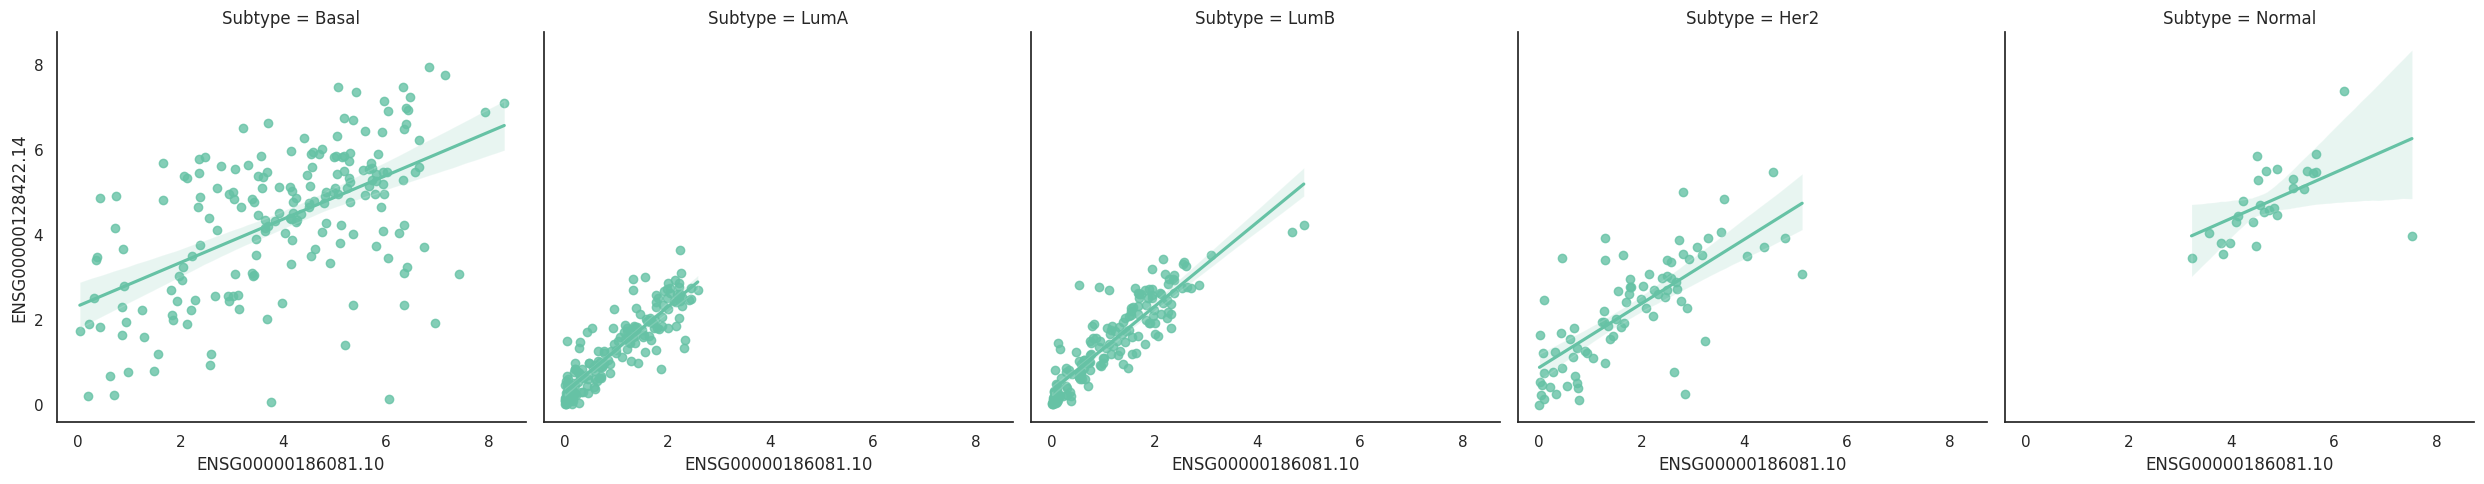

In [121]:
sns.lmplot(data=gene_exp, x="ENSG00000186081.10", y="ENSG00000128422.14", col="Subtype")
sns.despine()
print("Basal: ", Spe_B.statistic)
print("LumA: ", Spe_LA.statistic)
print("LumB: ", Spe_LB.statistic)
print("Her2: ", Spe_H.statistic)
print("Normal: ", Spe_N.statistic)

Based on the graphs and the spearman correlations, the two genes are positively correlated with each other. The Spearman coefficient indicates that the LumB subtype is the most correlated and the normal subtype is the least. The graphs additionally indicate that this correlation is linear.

## Clustering [20 pts]
You are wondering if the M genes considered by your dataset are enough to cluster the N patients by their cancer subtype.

In [136]:
### Apply the k-means alogirthm to your dataset
kmean_algo = sklearn.cluster.KMeans(n_clusters=5, n_init="auto")

In [137]:
kmeans_subset = kmean_algo.fit(gene_exp.iloc[:,:47])

In [138]:
print(kmeans_subset.cluster_centers_)
cent_by_axes = kmeans_subset.cluster_centers_.T
print(cent_by_axes)

[[2.2420837  2.9547506  3.35126201 2.90302833 0.51284562 2.51089777
  1.0010517  3.22992341 1.57621754 3.25328544 2.99119208 4.28609729
  1.57715626 3.04808955 2.38799061 1.76950338 3.29569133 2.34667088
  5.34274662 1.65632894 1.32230243 2.94348703 1.79123258 3.90397554
  2.1553769  3.81648201 3.1717538  2.22696795 2.29369646 2.19955205
  2.14500832 0.82617385 0.96768809 2.62222044 2.14293362 1.02359875
  2.49742248 1.56855859 2.29716687 1.42194364 1.47416247 3.42423649
  2.53937675 5.17006137 5.6225192  0.85247614 2.02233741]
 [1.36970318 0.74688366 1.09402218 2.37790302 2.43354339 1.5893983
  4.10223737 1.49278085 1.16704347 3.6495034  1.64688462 1.21255505
  0.57807849 3.51630403 2.8180736  4.11805904 1.92711802 1.73304048
  1.34367    4.6862884  0.92927473 2.46462996 2.20886462 2.98339136
  1.36403327 5.85691098 3.57876301 2.09369459 1.32977064 0.71800044
  1.52442862 1.63570939 0.71328127 1.74733818 1.23604993 3.8280585
  3.49752072 2.90192669 1.71517883 2.64817378 0.86834441 2.2

In [139]:
kmeans_subset.labels_

array([0, 3, 3, 3, 3, 0, 0, 3, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 0,
       3, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 0,
       3, 0, 3, 0, 3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0,
       3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3,
       3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3,
       0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 0, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 0, 3, 3, 0, 0, 3, 0, 3, 3, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 3,
       0, 3, 0, 3, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 3, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 4, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,

In [140]:
gene_exp.loc[:, "kmean_labels"] = kmeans_subset.labels_
gene_exp.head()

,ENSG00000011426.9,ENSG00000054598.6,ENSG00000062038.12,ENSG00000077152.8,ENSG00000082175.13,ENSG00000089685.13,ENSG00000091831.20,ENSG00000092621.10,ENSG00000094804.8,ENSG00000099953.8,...,ENSG00000173890.15,ENSG00000174371.15,ENSG00000175063.15,ENSG00000176890.14,ENSG00000186081.10,ENSG00000186847.5,ENSG00000186868.14,ENSG00000261857.5,Subtype,kmean_labels
0,1.326515,3.475678,2.374959,3.409941,0.014148,3.235387,0.094595,4.488874,2.023978,3.996567,...,1.751804,1.727270,4.541346,3.437507,5.678637,7.451924,0.598057,2.860720,Basal,0
1,1.885133,2.752910,3.770004,3.822052,0.051402,3.001023,0.241303,3.680198,1.820556,1.344271,...,0.949565,1.967062,4.167635,3.288760,5.370061,2.870596,0.102755,3.075090,Basal,3
2,3.246316,4.423018,3.700385,4.369893,0.155187,3.752491,0.102125,3.779098,2.218593,1.927426,...,1.063245,2.876544,4.498677,2.722251,3.125330,1.928449,0.374845,2.531836,Basal,3
3,2.161512,2.314358,3.562899,3.786747,0.039245,4.227823,0.493791,4.124650,2.202475,2.317170,...,0.577870,2.554480,4.879861,3.597988,5.953152,3.761062,0.528845,1.604472,Basal,3
4,2.795468,1.876752,0.658127,2.581386,0.014486,2.688765,0.432283,2.655957,1.872897,0.924654,...,0.272402,2.119050,3.571224,2.554718,0.189085,0.000000,0.199501,0.041927,Basal,3


In [141]:
### What value of k did you use and why?
print("I used k = 5 because there should be 5 different subtypes in our data, as in 5 groups")

I used k = 5 because there should be 5 different subtypes in our data, as in 5 groups


In [144]:
### Were you able to cluster the patients by cancer subtypes, while considering the expressions of the M genes?
gene_exp.loc[:, ["Subtype", "kmean_labels"]].value_counts()

Subtype  kmean_labels
LumA     1               170
LumB     2               165
Basal    3               126
Her2     4                82
Basal    0                65
Normal   0                25
LumA     2                 8
         4                 1
Normal   1                 1
         2                 1
         4                 1
Name: count, dtype: int64

In general, I was able to cluster the patients by cancer subtypes while considering M genes. However, there are some exceptions (e.g. a small portion of LumA in k-mean group 2 while most is in group 1 and the normal subtype is split between 3 k